# Аналіз графів

## Вступ до аналізу графів

Аналіз графів - це спеціалізована область data mining, яка зосереджується на пошуку патернів, структур та знань у графових даних. На відміну від традиційного data mining, який працює з табличними даними, аналіз графів має справу з сутностями (вузлами) та їх зв'язками (ребрами).

Аналіз графів має застосування в:
- Аналізі соціальних мереж
- Аналізі біологічних мереж
- Аналізі веб-даних та системах рекомендацій
- Транспортних мережах
- Виявленні фінансового шахрайства
- Кібербезпеці

## Основи теорії графів

Перед тим, як зануритися в алгоритми аналізу графів, давайте згадаємо фундаментальні концепції, які формують основу теорії графів.

### Основні компоненти графа

**Граф (G)**: Математична структура, що складається з:
- **Вершин (V)**: Також називаються вузлами, вони представляють сутності в системі
- **Ребер (E)**: Також називаються зв'язками, вони представляють зв'язки між сутностями

Граф формально визначається як $G = (V, E)$, де $V$ - множина вершин, а $E$ - множина ребер.

### Типи графів

**1. Орієнтовані vs Неорієнтовані графи**
- **Неорієнтований граф**: Ребра не мають напрямку; якщо є ребро між A та B, зв'язок є двонаправленим
- **Орієнтований граф (Диграф)**: Ребра мають напрямок; ребро від A до B відрізняється від ребра від B до A

**2. Зважені vs Незважені графи**
- **Незважений граф**: Всі ребра мають однакову важливість
- **Зважений граф**: Ребра мають пов'язані ваги, що представляють силу, вартість або важливість зв'язку

### Важливі властивості графів

**Ступінь**: Кількість ребер, інцидентних вершині
- В орієнтованих графах: вхідний ступінь (вхідні ребра) та вихідний ступінь (вихідні ребра)

**Шлях**: Послідовність вершин, де кожна сусідня пара з'єднана ребром

**Цикл**: Шлях, який починається та закінчується в тій самій вершині

**Зв'язність**: 
- **Зв'язний граф**: Є шлях між будь-якими двома вершинами
- **Сильно зв'язний**: В орієнтованих графах існує шлях між будь-якими двома вершинами

**Підграф**: Граф, утворений підмножиною вершин та ребер з оригінального графа

In [1]:
# Import necessary libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")
print(f"NetworkX version: {nx.__version__}")

Libraries imported successfully!
NetworkX version: 3.4.2


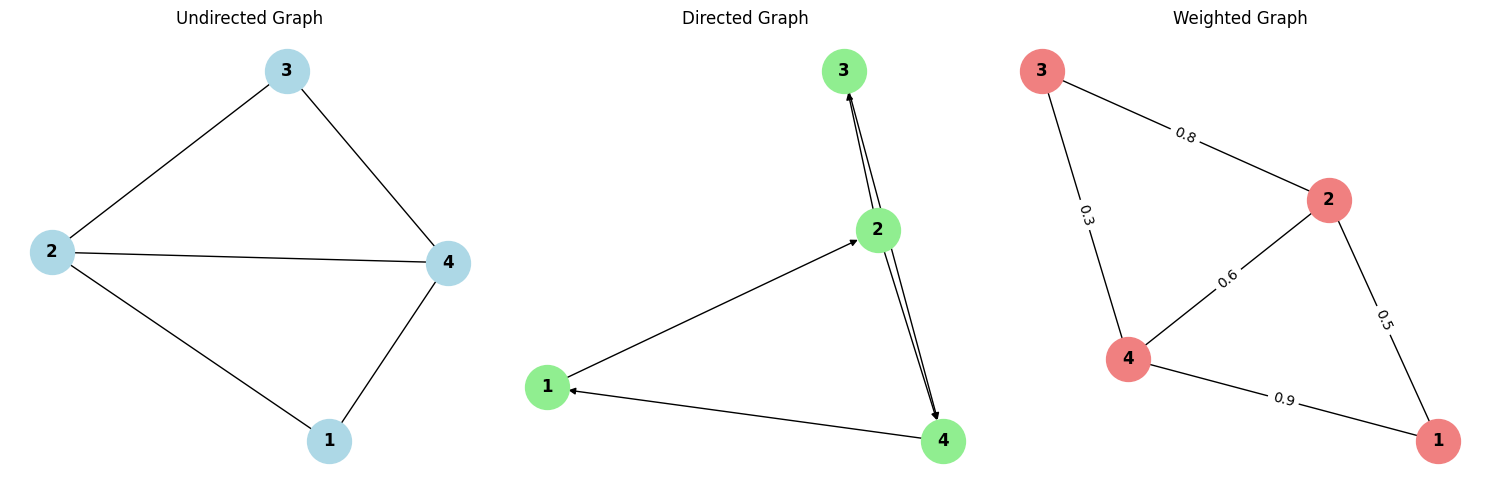

Graph Properties:
Undirected Graph - Nodes: 4, Edges: 5
Directed Graph - Nodes: 4, Edges: 5
Weighted Graph - Nodes: 4, Edges: 5


In [2]:
# Let's create and visualize different types of graphs to understand the concepts

# 1. Simple undirected graph
G_undirected = nx.Graph()
G_undirected.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (2, 4)])

# 2. Directed graph
G_directed = nx.DiGraph()
G_directed.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (2, 4)])

# 3. Weighted graph
G_weighted = nx.Graph()
G_weighted.add_weighted_edges_from([(1, 2, 0.5), (2, 3, 0.8), (3, 4, 0.3), (4, 1, 0.9), (2, 4, 0.6)])

# Visualize the graphs
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Undirected graph
nx.draw(G_undirected, ax=axes[0], with_labels=True, node_color='lightblue', 
        node_size=1000, font_size=12, font_weight='bold')
axes[0].set_title('Undirected Graph')

# Directed graph
nx.draw(G_directed, ax=axes[1], with_labels=True, node_color='lightgreen', 
        node_size=1000, font_size=12, font_weight='bold', arrows=True)
axes[1].set_title('Directed Graph')

# Weighted graph
pos = nx.spring_layout(G_weighted)
nx.draw(G_weighted, pos, ax=axes[2], with_labels=True, node_color='lightcoral', 
        node_size=1000, font_size=12, font_weight='bold')
# Draw edge labels for weights
edge_labels = nx.get_edge_attributes(G_weighted, 'weight')
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels, ax=axes[2])
axes[2].set_title('Weighted Graph')

plt.tight_layout()
plt.show()

# Print basic properties
print("Graph Properties:")
print(f"Undirected Graph - Nodes: {G_undirected.number_of_nodes()}, Edges: {G_undirected.number_of_edges()}")
print(f"Directed Graph - Nodes: {G_directed.number_of_nodes()}, Edges: {G_directed.number_of_edges()}")
print(f"Weighted Graph - Nodes: {G_weighted.number_of_nodes()}, Edges: {G_weighted.number_of_edges()}")

In [3]:
# Create a sample social network for our demonstrations
# This represents a small social network with different types of relationships

# Create a directed graph representing a social network
social_network = nx.DiGraph()

# Add nodes with attributes
people = ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace', 'Henry', 'Ivy', 'Jack']
social_network.add_nodes_from(people)

# Add edges representing relationships (follows, mentions, etc.)
relationships = [
    ('Alice', 'Bob'), ('Alice', 'Charlie'), ('Alice', 'Diana'),
    ('Bob', 'Alice'), ('Bob', 'Charlie'), ('Bob', 'Eve'),
    ('Charlie', 'Alice'), ('Charlie', 'Bob'), ('Charlie', 'Diana'), ('Charlie', 'Eve'),
    ('Diana', 'Alice'), ('Diana', 'Charlie'), ('Diana', 'Frank'),
    ('Eve', 'Bob'), ('Eve', 'Charlie'), ('Eve', 'Grace'),
    ('Frank', 'Diana'), ('Frank', 'Grace'), ('Frank', 'Henry'),
    ('Grace', 'Eve'), ('Grace', 'Frank'), ('Grace', 'Ivy'),
    ('Henry', 'Frank'), ('Henry', 'Grace'), ('Henry', 'Jack'),
    ('Ivy', 'Grace'), ('Ivy', 'Henry'), ('Ivy', 'Jack'),
    ('Jack', 'Henry'), ('Jack', 'Ivy')
]

social_network.add_edges_from(relationships)

# Add some weights to represent interaction strength
edge_weights = {
    ('Alice', 'Bob'): 0.9, ('Alice', 'Charlie'): 0.8, ('Alice', 'Diana'): 0.7,
    ('Bob', 'Alice'): 0.9, ('Bob', 'Charlie'): 0.6, ('Bob', 'Eve'): 0.5,
    ('Charlie', 'Alice'): 0.8, ('Charlie', 'Bob'): 0.6, ('Charlie', 'Diana'): 0.9, ('Charlie', 'Eve'): 0.4,
    ('Diana', 'Alice'): 0.7, ('Diana', 'Charlie'): 0.9, ('Diana', 'Frank'): 0.8,
    ('Eve', 'Bob'): 0.5, ('Eve', 'Charlie'): 0.4, ('Eve', 'Grace'): 0.7,
    ('Frank', 'Diana'): 0.8, ('Frank', 'Grace'): 0.6, ('Frank', 'Henry'): 0.9,
    ('Grace', 'Eve'): 0.7, ('Grace', 'Frank'): 0.6, ('Grace', 'Ivy'): 0.8,
    ('Henry', 'Frank'): 0.9, ('Henry', 'Grace'): 0.5, ('Henry', 'Jack'): 0.7,
    ('Ivy', 'Grace'): 0.8, ('Ivy', 'Henry'): 0.6, ('Ivy', 'Jack'): 0.9,
    ('Jack', 'Henry'): 0.7, ('Jack', 'Ivy'): 0.9
}

# Add weights to edges
for edge, weight in edge_weights.items():
    social_network[edge[0]][edge[1]]['weight'] = weight

print("Social Network Created!")
print(f"Nodes: {social_network.number_of_nodes()}")
print(f"Edges: {social_network.number_of_edges()}")
print(f"Average degree: {sum(dict(social_network.degree()).values()) / social_network.number_of_nodes():.2f}")

Social Network Created!
Nodes: 10
Edges: 30
Average degree: 6.00


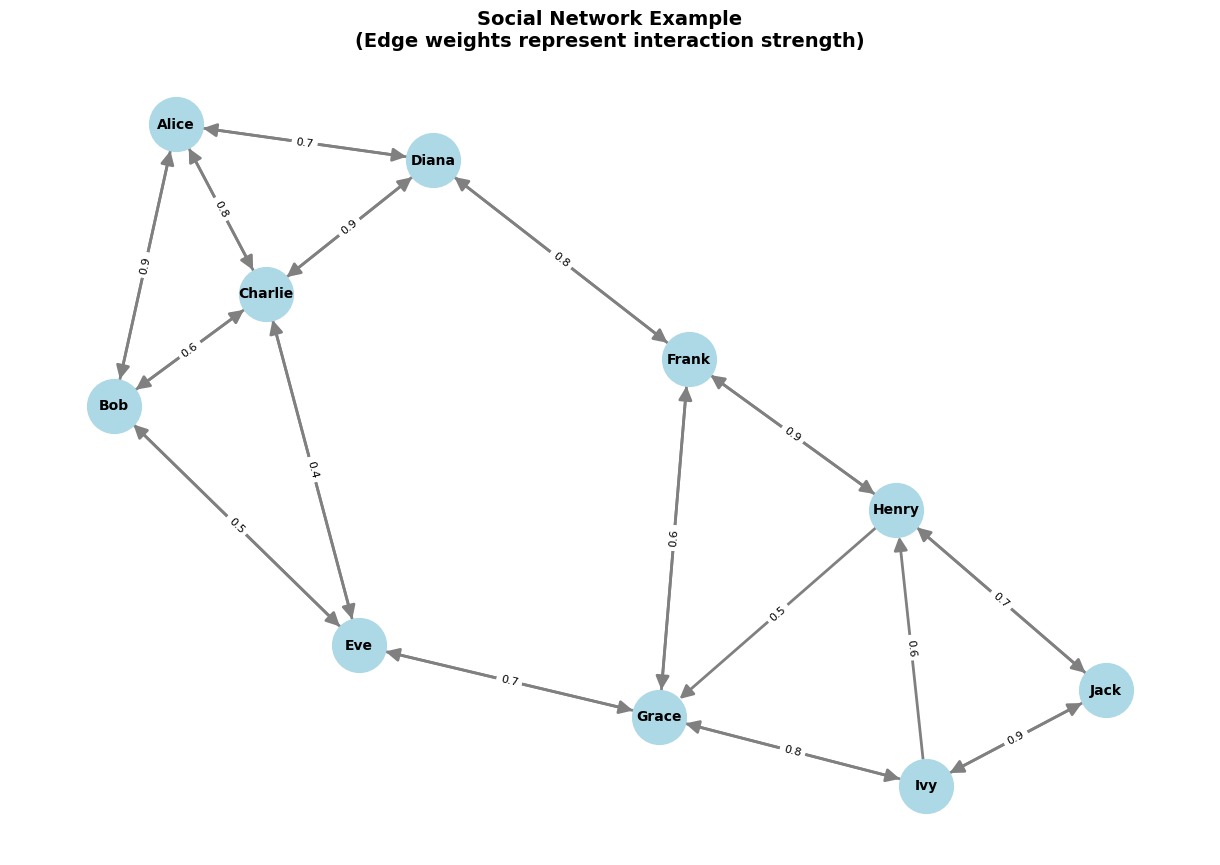

In [4]:
# Visualize the social network
plt.figure(figsize=(12, 8))

# Use spring layout for better visualization
pos = nx.spring_layout(social_network)

# Draw the network
nx.draw(social_network, pos, 
        with_labels=True, 
        node_color='lightblue', 
        node_size=1500, 
        font_size=10, 
        font_weight='bold',
        arrows=True,
        arrowsize=20,
        edge_color='gray',
        width=2)

# Add edge weights as labels
edge_labels = nx.get_edge_attributes(social_network, 'weight')
nx.draw_networkx_edge_labels(social_network, pos, 
                            {k: f'{v:.1f}' for k, v in edge_labels.items()}, 
                            font_size=8)

plt.title('Social Network Example\n(Edge weights represent interaction strength)', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


## 1. Пошук спільнот

### Теорія: Пошук спільнот та алгоритм Louvain

**Мета**: Ідентифікувати групи вузлів, які більш щільно з'єднані внутрішньо, ніж зовнішньо.

**Застосування**: Аналіз соціальних мереж, кластеризація біологічних мереж, системи рекомендацій

Алгоритм Louvain - це жадібний метод оптимізації, який максимізує модулярність для знаходження спільнот у мережах.

**Формула модулярності**:
$$Q = \frac{1}{2m} \sum_{ij} \left[ A_{ij} - \frac{k_i k_j}{2m} \right] \delta(c_i, c_j)$$

Де:
- $A_{ij}$ - матриця суміжності
- $k_i$ - ступінь вузла $i$
- $m$ - загальна кількість ребер
- $\delta(c_i, c_j)$ дорівнює 1, якщо вузли $i$ та $j$ в одній спільноті, інакше 0

**Кроки алгоритму**:
1. Почати з кожного вузла у власній спільноті
2. Для кожного вузла обчислити приріст модулярності від переміщення його до спільноти кожного сусіда
3. Перемістити вузол до спільноти, яка дає максимальний позитивний приріст
4. Повторювати до тих пір, поки не можливо покращення
5. Створити новий граф, де вузли - це знайдені спільноти
6. Повторити процес на новому графі

In [5]:
# Community Detection using Louvain Algorithm
# First, we need to convert our directed graph to undirected for community detection
social_undirected = social_network.to_undirected()

# Apply Louvain algorithm for community detection
import networkx.algorithms.community as nx_comm

# Find communities
communities = nx_comm.louvain_communities(social_undirected, weight='weight')

print("Community Detection Results:")
print(f"Number of communities found: {len(communities)}")
print("\nCommunities:")
for i, community in enumerate(communities):
    print(f"Community {i+1}: {list(community)}")

# Calculate modularity
modularity = nx_comm.modularity(social_undirected, communities, weight='weight')
print(f"\nModularity: {modularity:.3f}")


Community Detection Results:
Number of communities found: 2

Communities:
Community 1: ['Charlie', 'Eve', 'Diana', 'Bob', 'Alice']
Community 2: ['Frank', 'Jack', 'Grace', 'Ivy', 'Henry']

Modularity: 0.367


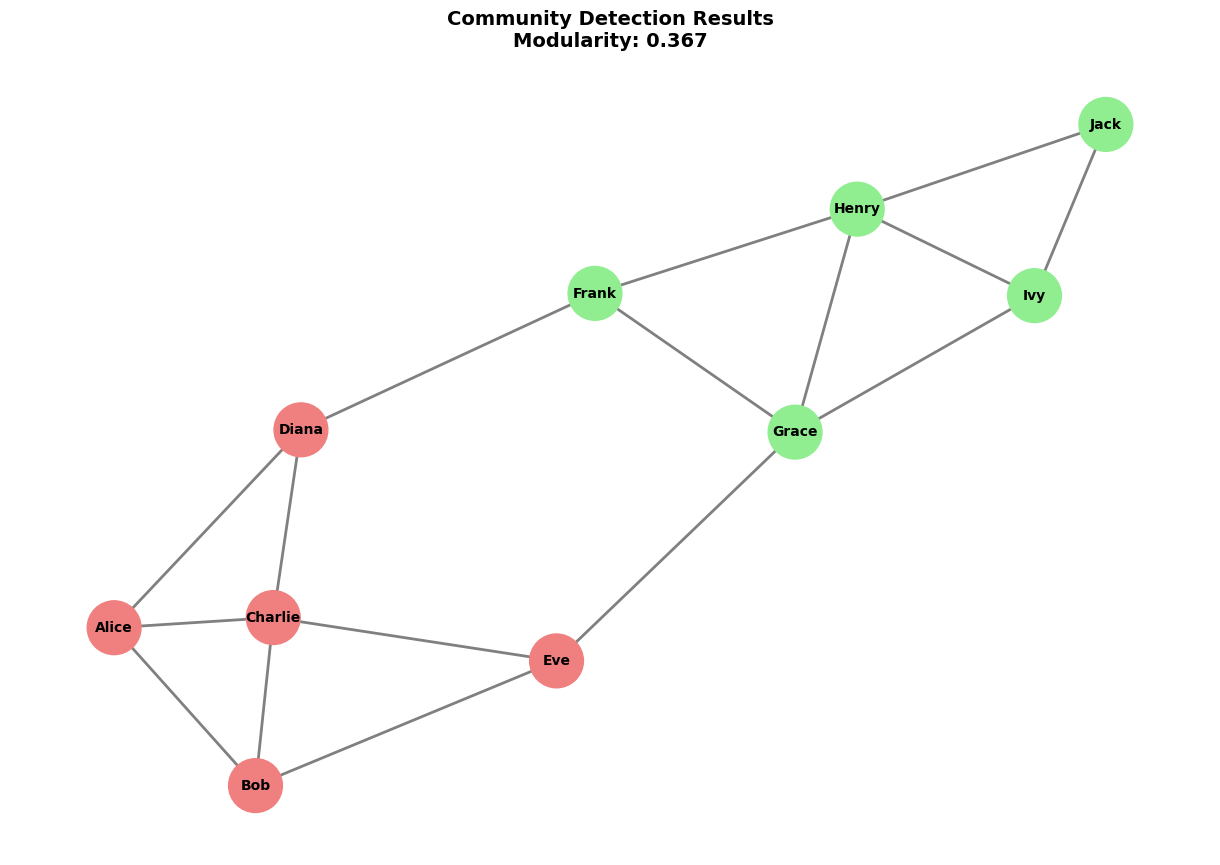

In [6]:
# Visualize communities
plt.figure(figsize=(12, 8))

# Create color map for communities
colors = ['lightcoral', 'lightgreen', 'lightblue', 'lightyellow', 'lightpurple', 'lightbrown', 'lightpink', 'lightgray']
node_colors = ['white'] * social_undirected.number_of_nodes()

for i, community in enumerate(communities):
    color = colors[i % len(colors)]
    for node in community:
        node_idx = list(social_undirected.nodes()).index(node)
        node_colors[node_idx] = color

# Draw the network with community colors
pos = nx.spring_layout(social_undirected)
nx.draw(social_undirected, pos, 
        with_labels=True, 
        node_color=node_colors, 
        node_size=1500, 
        font_size=10, 
        font_weight='bold',
        edge_color='gray',
        width=2)

plt.title(f'Community Detection Results\nModularity: {modularity:.3f}', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


## 2. Аналіз центральності

### Теорія: Алгоритм PageRank

**Мета**: Ідентифікувати найважливіші або найвпливовіші вузли в мережі.

**Застосування**: Аналіз соціального впливу, стійкість мережі, аналіз потоку інформації

PageRank - це алгоритм, який вимірює важливість вузлів в орієнтованому графі, спочатку розроблений для ранжування веб-сторінок.

**Формула PageRank**:
$$PR(A) = \frac{1-d}{N} + d \sum_{B \in M(A)} \frac{PR(B)}{L(B)}$$

Де:
- $PR(A)$ - PageRank сторінки A
- $d$ - коефіцієнт затухання (зазвичай 0.85)
- $N$ - загальна кількість сторінок
- $M(A)$ - множина сторінок, які посилаються на A
- $L(B)$ - кількість вихідних посилань зі сторінки B

**Кроки алгоритму**:
1. Ініціалізувати всі вузли з рівними значеннями PageRank
2. Ітеративно оновлювати значення PageRank, використовуючи формулу
3. Продовжувати до збіжності (значення стабілізуються)

In [7]:
# PageRank Analysis
pagerank_scores = nx.pagerank(social_network, weight='weight')

# Sort nodes by PageRank score
sorted_pagerank = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)

print("PageRank Analysis Results:")
print("=" * 40)
for i, (node, score) in enumerate(sorted_pagerank, 1):
    print(f"{i:2d}. {node:8s}: {score:.4f}")

# Also calculate other centrality measures for comparison
degree_centrality = nx.degree_centrality(social_network)
betweenness_centrality = nx.betweenness_centrality(social_network, weight='weight')
closeness_centrality = nx.closeness_centrality(social_network, distance='weight')

# Create a comparison table
centrality_df = pd.DataFrame({
    'Node': list(social_network.nodes()),
    'PageRank': [pagerank_scores[node] for node in social_network.nodes()],
    'Degree': [degree_centrality[node] for node in social_network.nodes()],
    'Betweenness': [betweenness_centrality[node] for node in social_network.nodes()],
    'Closeness': [closeness_centrality[node] for node in social_network.nodes()]
})

print("\nCentrality Measures Comparison:")
print(centrality_df.round(4))

PageRank Analysis Results:
 1. Charlie : 0.1229
 2. Grace   : 0.1155
 3. Alice   : 0.1095
 4. Frank   : 0.1094
 5. Diana   : 0.1093
 6. Henry   : 0.0970
 7. Bob     : 0.0953
 8. Ivy     : 0.0865
 9. Eve     : 0.0834
10. Jack    : 0.0713

Centrality Measures Comparison:
      Node  PageRank  Degree  Betweenness  Closeness
0    Alice    0.1095  0.6667       0.0000     0.5921
1      Bob    0.0953  0.6667       0.0000     0.7143
2  Charlie    0.1229  0.8889       0.1597     0.7965
3    Diana    0.1093  0.6667       0.0694     0.6977
4      Eve    0.0834  0.6667       0.3472     0.9000
5    Frank    0.1094  0.6667       0.1458     0.7759
6    Grace    0.1155  0.7778       0.4444     0.9574
7    Henry    0.0970  0.6667       0.1389     0.6040
8      Ivy    0.0865  0.5556       0.1111     0.6122
9     Jack    0.0713  0.4444       0.0000     0.4865


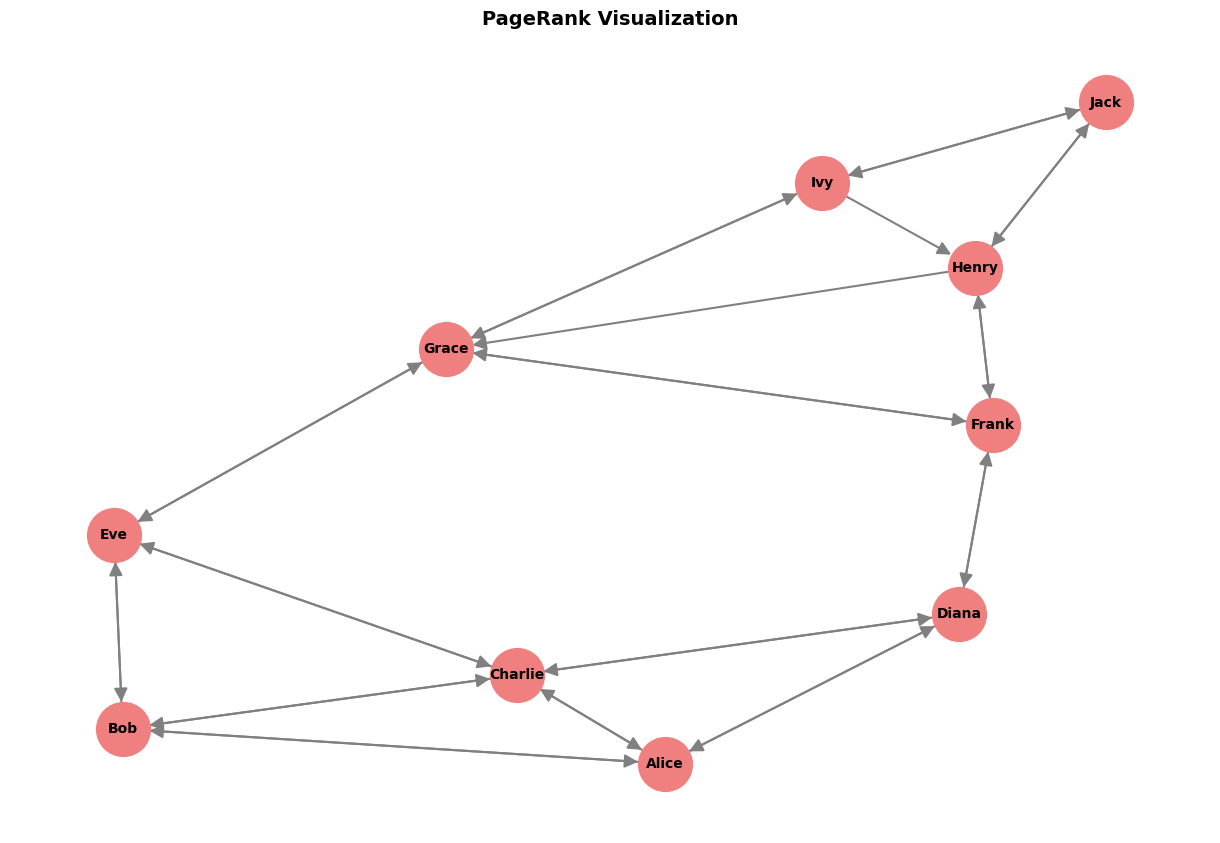

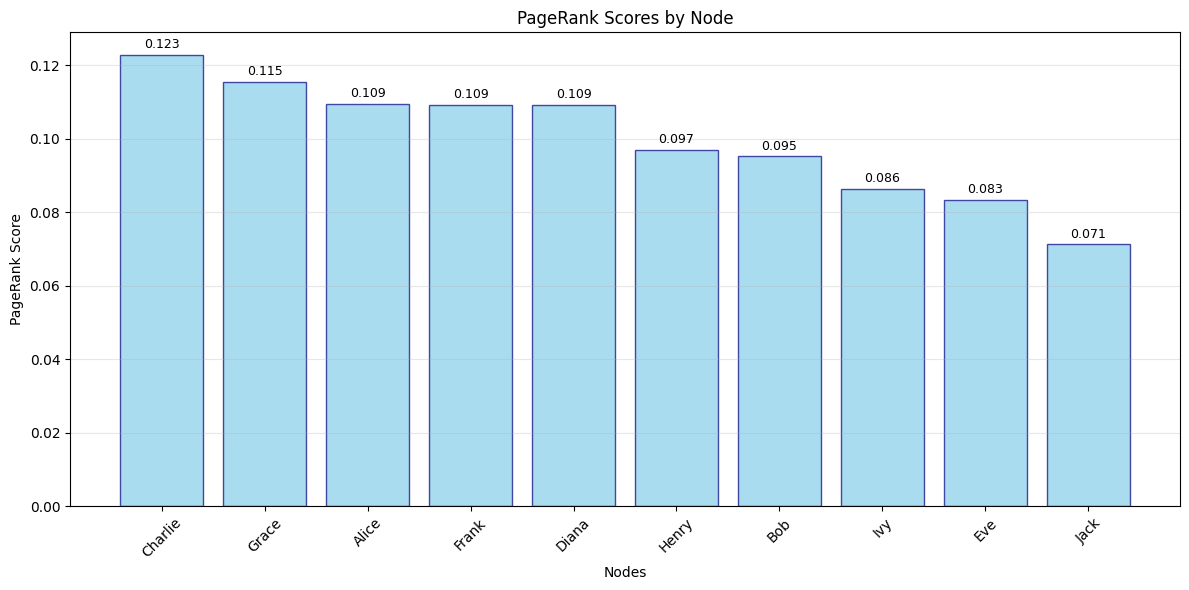

In [8]:
# Visualize PageRank scores
plt.figure(figsize=(12, 8))

pos = nx.spring_layout(social_network, seed=10)
nx.draw(social_network, pos, 
        with_labels=True, 
        node_color='lightcoral', 
        node_size=1500, 
        font_size=10, 
        font_weight='bold',
        arrows=True,
        arrowsize=20,
        edge_color='gray',
        width=1.5)

plt.title('PageRank Visualization', fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# Create a bar chart of PageRank scores
plt.figure(figsize=(12, 6))
nodes = [item[0] for item in sorted_pagerank]
scores = [item[1] for item in sorted_pagerank]

bars = plt.bar(range(len(nodes)), scores, color='skyblue', edgecolor='navy', alpha=0.7)
plt.xlabel('Nodes')
plt.ylabel('PageRank Score')
plt.title('PageRank Scores by Node')
plt.xticks(range(len(nodes)), nodes, rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, scores)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{score:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 3. Прогнозування зв'язків

### Теорія: Спільні сусіди з коефіцієнтом Жаккара

**Мета**: Прогнозувати відсутні або майбутні зв'язки між вузлами.

**Застосування**: Системи рекомендацій, прогнозування взаємодії білків, зростання соціальних мереж

Цей метод прогнозує зв'язки на основі схожості околиць вузлів.

**Коефіцієнт Жаккара**:
$$J(A,B) = \frac{|N(A) \cap N(B)|}{|N(A) \cup N(B)|}$$

Де $N(A)$ - множина сусідів вузла A.

**Оцінка**:
$$score(A,B) = |N(A) \cap N(B)| \times J(A,B)$$

Алгоритм працює так:
1. Для кожної пари нез'єднаних вузлів обчислити кількість спільних сусідів
2. Обчислити коефіцієнт Жаккара для вимірювання схожості околиць вузлів
3. Поєднати ці міри для отримання оцінки прогнозування
4. Ранжувати всі можливі зв'язки за їх оцінками прогнозування

In [9]:
# Link Prediction Implementation
def jaccard_coefficient(graph, u, v):
    """Calculate Jaccard coefficient between two nodes."""
    neighbors_u = set(graph.neighbors(u))
    neighbors_v = set(graph.neighbors(v))
    
    intersection = len(neighbors_u.intersection(neighbors_v))
    union = len(neighbors_u.union(neighbors_v))
    
    if union == 0:
        return 0
    return intersection / union

def common_neighbors_score(graph, u, v):
    """Calculate common neighbors score."""
    neighbors_u = set(graph.neighbors(u))
    neighbors_v = set(graph.neighbors(v))
    return len(neighbors_u.intersection(neighbors_v))

def link_prediction_score(graph, u, v):
    """Calculate combined link prediction score."""
    cn_score = common_neighbors_score(graph, u, v)
    jc_score = jaccard_coefficient(graph, u, v)
    return cn_score * jc_score

# Convert to undirected for link prediction
social_undirected = social_network.to_undirected()

# Find all possible pairs of unconnected nodes
all_pairs = []
for u in social_undirected.nodes():
    for v in social_undirected.nodes():
        if u != v and not social_undirected.has_edge(u, v):
            all_pairs.append((u, v))

# Calculate prediction scores for all unconnected pairs
prediction_scores = []
for u, v in all_pairs:
    score = link_prediction_score(social_undirected, u, v)
    cn = common_neighbors_score(social_undirected, u, v)
    jc = jaccard_coefficient(social_undirected, u, v)
    prediction_scores.append((u, v, score, cn, jc))

# Sort by prediction score
prediction_scores.sort(key=lambda x: x[2], reverse=True)

print("Link Prediction Results:")
print("=" * 80)
print(f"{'Rank':<4} {'Node 1':<8} {'Node 2':<8} {'Score':<8} {'Common Neighbors':<16} {'Jaccard Coeff':<12}")
print("-" * 80)

for i, (u, v, score, cn, jc) in enumerate(prediction_scores[:10], 1):
    print(f"{i:<4} {u:<8} {v:<8} {score:<8.3f} {cn:<16} {jc:<12.3f}")

print(f"\nTotal possible new connections: {len(prediction_scores)}")
print(f"Top 5 most likely connections:")
for i, (u, v, score, cn, jc) in enumerate(prediction_scores[:5], 1):
    print(f"{i}. {u} - {v} (Score: {score:.3f})")


Link Prediction Results:
Rank Node 1   Node 2   Score    Common Neighbors Jaccard Coeff
--------------------------------------------------------------------------------
1    Alice    Eve      1.000    2                0.500       
2    Bob      Diana    1.000    2                0.500       
3    Diana    Bob      1.000    2                0.500       
4    Eve      Alice    1.000    2                0.500       
5    Frank    Ivy      1.000    2                0.500       
6    Grace    Jack     1.000    2                0.500       
7    Ivy      Frank    1.000    2                0.500       
8    Jack     Grace    1.000    2                0.500       
9    Frank    Jack     0.250    1                0.250       
10   Jack     Frank    0.250    1                0.250       

Total possible new connections: 58
Top 5 most likely connections:
1. Alice - Eve (Score: 1.000)
2. Bob - Diana (Score: 1.000)
3. Diana - Bob (Score: 1.000)
4. Eve - Alice (Score: 1.000)
5. Frank - Ivy (Score: 1

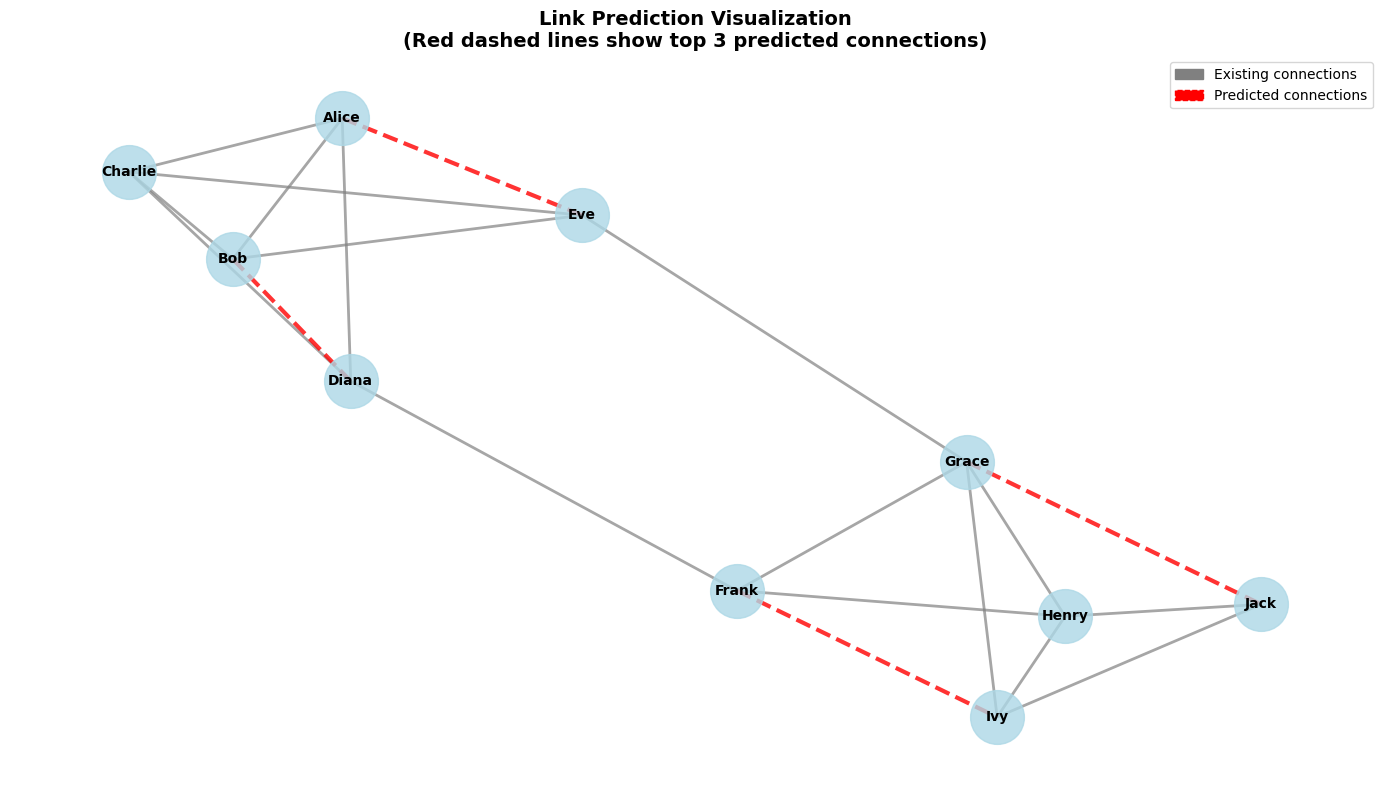

In [18]:
# Visualize the top predicted connections
plt.figure(figsize=(14, 8))

# Create a copy of the graph for visualization
G_viz = social_undirected.copy()

# Add the top 3 predicted connections as dashed edges
top_predictions = [(u, v, score, cn, jc) for u, v, score, cn, jc in prediction_scores if score > 0.8]
for u, v, score, cn, jc in top_predictions:
    G_viz.add_edge(u, v, predicted=True, score=score)

# Separate existing and predicted edges
existing_edges = [(u, v) for u, v in G_viz.edges() if not G_viz[u][v].get('predicted', False)]
predicted_edges = [(u, v) for u, v in G_viz.edges() if G_viz[u][v].get('predicted', False)]

# Draw the network
pos = nx.spring_layout(G_viz)

# Draw existing edges
nx.draw_networkx_edges(G_viz, pos, edgelist=existing_edges, 
                      edge_color='gray', width=2, alpha=0.7)

# Draw predicted edges
nx.draw_networkx_edges(G_viz, pos, edgelist=predicted_edges, 
                      edge_color='red', width=3, alpha=0.8, style='dashed')

# Draw nodes
nx.draw_networkx_nodes(G_viz, pos, node_color='lightblue', 
                      node_size=1500, alpha=0.8)

# Draw labels
nx.draw_networkx_labels(G_viz, pos, font_size=10, font_weight='bold')

# Add legend
import matplotlib.patches as mpatches
existing_patch = mpatches.Patch(color='gray', label='Existing connections')
predicted_patch = mpatches.Patch(color='red', linestyle='--', label='Predicted connections')
plt.legend(handles=[existing_patch, predicted_patch], loc='upper right')

plt.title('Link Prediction Visualization\n(Red dashed lines show top 3 predicted connections)', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


## 4. Кластеризація графів

### Теорія: Спектральна кластеризація

**Мета**: Розбити вузли на групи на основі структурної схожості.

**Застосування**: Аналіз мереж, організація даних, виявлення аномалій

Спектральна кластеризація використовує власні значення та власні вектори лапласіана графа для виконання кластеризації.

**Лапласіан графа**:
$$L = D - A$$

Де $D$ - матриця ступенів, а $A$ - матриця суміжності.

![Matrix D](images/13.0-matrix-d.png)

[Джерело зображення](https://uk.wikipedia.org/wiki/%D0%A1%D1%82%D0%B5%D0%BF%D0%B5%D0%BD%D0%B5%D0%B2%D0%B0_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D1%8F)

![Matrix A](images/13.1-matrix-a.png)

[Джерело зображення](https://uk.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D1%80%D0%B8%D1%86%D1%8F_%D1%81%D1%83%D0%BC%D1%96%D0%B6%D0%BD%D0%BE%D1%81%D1%82%D1%96)

**Кроки алгоритму**:
1. Обчислити лапласіан графа
2. Знайти $k$ найменших власних значень та їх власні вектори
3. Використати власні вектори як ознаки для кластеризації k-means

**Чому це працює**: Власні вектори лапласіана захоплюють структуру графа, причому перші кілька власних векторів відповідають найбільш значущим розрізам у графі.

In [ ]:
# Spectral Clustering Implementation
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Convert graph to adjacency matrix
adjacency_matrix = nx.adjacency_matrix(social_undirected, weight='weight').toarray()

# Apply spectral clustering with different numbers of clusters
n_clusters_range = range(2, 6)
spectral_results = {}

for n_clusters in n_clusters_range:
    # Apply spectral clustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
    cluster_labels = spectral.fit_predict(adjacency_matrix)
    
    # Store results
    spectral_results[n_clusters] = cluster_labels
    
    print(f"Spectral Clustering with {n_clusters} clusters:")
    print(f"Cluster assignments: {cluster_labels}")
    
    # Create cluster groups
    clusters = {}
    for i, label in enumerate(cluster_labels):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(list(social_undirected.nodes())[i])
    
    for cluster_id, nodes in clusters.items():
        print(f"  Cluster {cluster_id}: {nodes}")
    print()

# Choose the best number of clusters (let's use 3 for visualization)
best_n_clusters = 3
best_labels = spectral_results[best_n_clusters]

print(f"Using {best_n_clusters} clusters for visualization:")
print(f"Cluster assignments: {best_labels}")

# Create cluster groups
clusters = {}
for i, label in enumerate(best_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(list(social_undirected.nodes())[i])

for cluster_id, nodes in clusters.items():
    print(f"Cluster {cluster_id}: {nodes}")

Spectral Clustering with 2 clusters:
Cluster assignments: [0 0 0 0 0 1 1 1 1 1]
  Cluster 0: ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve']
  Cluster 1: ['Frank', 'Grace', 'Henry', 'Ivy', 'Jack']

Spectral Clustering with 3 clusters:
Cluster assignments: [0 0 0 2 0 2 1 1 1 1]
  Cluster 0: ['Alice', 'Bob', 'Charlie', 'Eve']
  Cluster 2: ['Diana', 'Frank']
  Cluster 1: ['Grace', 'Henry', 'Ivy', 'Jack']

Spectral Clustering with 4 clusters:
Cluster assignments: [0 0 0 3 2 3 2 1 1 1]
  Cluster 0: ['Alice', 'Bob', 'Charlie']
  Cluster 3: ['Diana', 'Frank']
  Cluster 2: ['Eve', 'Grace']
  Cluster 1: ['Henry', 'Ivy', 'Jack']

Spectral Clustering with 5 clusters:
Cluster assignments: [4 4 0 0 2 1 2 1 3 3]
  Cluster 4: ['Alice', 'Bob']
  Cluster 0: ['Charlie', 'Diana']
  Cluster 2: ['Eve', 'Grace']
  Cluster 1: ['Frank', 'Henry']
  Cluster 3: ['Ivy', 'Jack']

Using 3 clusters for visualization:
Cluster assignments: [0 0 0 2 0 2 1 1 1 1]
Cluster 0: ['Alice', 'Bob', 'Charlie', 'Eve']
Cluster 2: ['Di

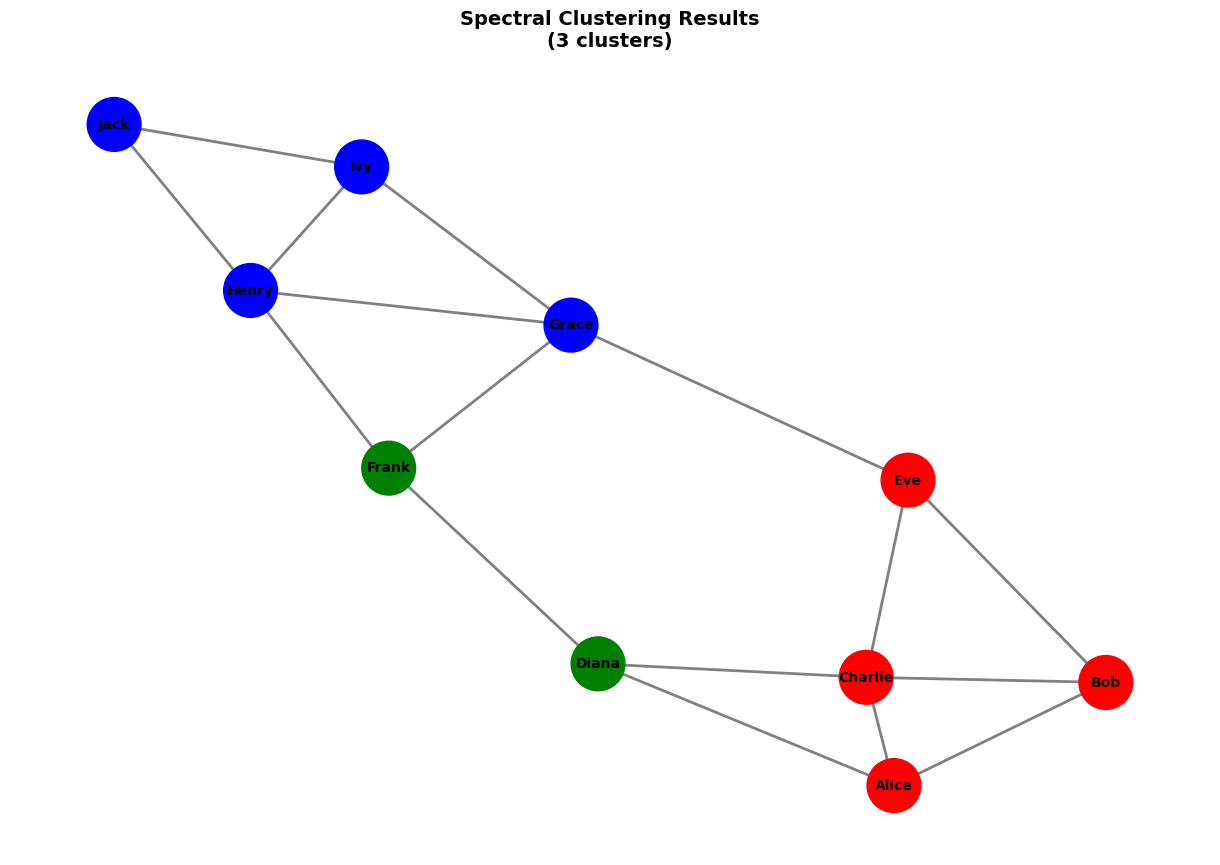


Comparison with Louvain Algorithm:
Spectral Clustering labels: [0 0 0 2 0 2 1 1 1 1]
Louvain Algorithm labels:   [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

Similarity Metrics:
Adjusted Rand Index: 0.580
Normalized Mutual Information: 0.634


In [ ]:
# Visualize spectral clustering results
plt.figure(figsize=(12, 8))

# Create color map for clusters
colors = ['red', 'blue', 'green', 'orange', 'purple']
node_colors = ['white'] * social_undirected.number_of_nodes()

for i, label in enumerate(best_labels):
    color = colors[label % len(colors)]
    node_colors[i] = color

# Draw the network with cluster colors
pos = nx.spring_layout(social_undirected)
nx.draw(social_undirected, pos, 
        with_labels=True, 
        node_color=node_colors, 
        node_size=1500, 
        font_size=10, 
        font_weight='bold',
        edge_color='gray',
        width=2)

plt.title(f'Spectral Clustering Results\n({best_n_clusters} clusters)', 
          fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# Compare with Louvain communities
print("\nComparison with Louvain Algorithm:")
print("=" * 50)

# Convert Louvain communities to labels for comparison
louvain_labels = [-1] * len(social_undirected.nodes())
for i, node in enumerate(social_undirected.nodes()):
    for j, community in enumerate(communities):
        if node in community:
            louvain_labels[i] = j
            break

print(f"Spectral Clustering labels: {best_labels}")
print(f"Louvain Algorithm labels:   {louvain_labels}")

# Calculate similarity metrics
ari_score = adjusted_rand_score(best_labels, louvain_labels)
nmi_score = normalized_mutual_info_score(best_labels, louvain_labels)

print(f"\nSimilarity Metrics:")
print(f"Adjusted Rand Index: {ari_score:.3f}")
print(f"Normalized Mutual Information: {nmi_score:.3f}")